# Mean-field:  The Hartree-Fock (HF) Approximation
## Triangular Latice Hubbard model

This notebook contains breif notes and several sample codes of the HF approximation for pedagogical purpose. The following text and codes are prepared by Mr.[Shibo Shan](https://quantummc.xyz/shibo-shan/), Mr.[Ting-Tung Wang](https://quantummc.xyz/members/ting-tung-wang/), Mr.[Menghan Song](https://quantummc.xyz/members/menghan-song/) and [ZYM](https://quantummc.xyz/members/ziyang-meng/).

In this notebook, we test the gradient descent method for the Hubbard model on the triangular lattice. One may want to review [HF for square lattice](https://colab.research.google.com/github/songmengh/mean-field/blob/main/HF_Hubbard_square.ipynb) for the detailed description of the algorithms.

This note utilises the following useful references:
1. [Mingpu Qin., arXiv:2110.12400(2022)](https://arxiv.org/abs/2110.12400)
2. [Lechermann, Model Hamiltonians and Basic Techniques](https://www.researchgate.net/publication/299842893_Model_Hamiltonians_and_Basic_Techniques)
3. [Hirsch, Phys. Rev. B 31, 4403 (1985)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.31.4403)
4. [T. Hanisch, Annalen der Physik 507, 303 (1995)](https://onlinelibrary.wiley.com/doi/abs/10.1002/andp.19955070405)

### 1. Hubbard model: triangular Lattice

Considering the half-filling case, the Hamiltonian of the hubbard model is,

$$
H=-t\mathop{\sum}\limits_{\langle i,j \rangle \sigma}c_{i\sigma}^\dagger c_{j\sigma}+h.c.+U\mathop{\sum}\limits_i (n_{i\uparrow}-\frac{1}{2})(n_{i\downarrow}-\frac{1}{2})=H_{band}+H_U  \ \ \  (U>0),
$$
where $\langle i,j \rangle$ denotes the nearest neighbour hopping on the triangular lattice.

The figure below shows the triangular lattice and its first Brillouin zone.

<p align="center">
<img src="https://github.com/songmengh/mean-field/blob/main/figures/lattice_tri_2.png?raw=1" width=400/>
<img src="https://github.com/songmengh/mean-field/blob/main/figures/BZ_tri.png?raw=1" width=350/>
</p>

Here $\mathbf{a_1}=(1,0) ,\mathbf{a_2}=(\frac{1}{2},\frac{\sqrt{3}}{2}) $ are the two primitive vectors. $\mathbf{b_1}=(2\pi,-\frac{2\pi}{\sqrt{3}}) ,\mathbf{b_2}=(0,\frac{4\pi}{\sqrt{3}}) $ are the two reciprocal lattice vectors.

We will first calculate the $H_{band}$ term. We use $c^{\dagger}_{i\pm \mathbf{a_j}}$ and $c_{i\pm \mathbf{a_j}}$ to represent the creation and annihilation of an electron at site located at $\mathbf{r_i}\pm \mathbf{a_j}$. We obtains

$$
H_{band} = -t\mathop{\sum}\limits_{\langle i,j \rangle \sigma}c_{i\sigma}^\dagger c_{j\sigma}+h.c. = -t\sum_ic_i^\dagger(c_{i+\mathbf{a_1}}+c_{i+\mathbf{a_2}}+c_{i-\mathbf{a_1}}+c_{i-\mathbf{a_2}}+c_{i+\mathbf{a_1}-\mathbf{a_2}}+c_{i+\mathbf{a_2}-\mathbf{a_1}})
$$
Applying

$$
c_i = \sqrt{\frac{1}{N}}\sum_\mathbf{k}e^{i\mathbf{k}\cdot\mathbf{r_i}}c_{\mathbf{k}},\quad
c_i^\dagger = \sqrt{\frac{1}{N}}\sum_\mathbf{k}e^{-i\mathbf{k}\cdot\mathbf{r_i}}c_\mathbf{k}^\dagger
$$

$$
\sum_ie^{i\mathbf{r_i}\cdot(\mathbf{k_1}-\mathbf{k_2})}=N\delta_{\mathbf{k_1},\mathbf{k_2}}
$$

we obtain

$$
\begin{aligned}
H_{band} &= -2t\sum_\mathbf{k}c_\mathbf{k}^\dagger c_\mathbf{k}(\cos(\mathbf{k\cdot a_1})+\cos(\mathbf{k\cdot a_2})+\cos(\mathbf{k\cdot (a_1-a_2)}))\\
& = -2t\sum_\mathbf{k}c_\mathbf{k}^\dagger c_\mathbf{k}\left(\cos k_x+2 \cos \left(\frac{k_x}{2}\right) \cos \left(\frac{\sqrt{3} k_y}{2}\right)\right)
\end{aligned}
$$

The dispersion relation is
$$
\epsilon_\mathbf{k} = -2\left(\cos k_x+2 \cos \left(\frac{k_x}{2}\right) \cos \left(\frac{\sqrt{3} k_y}{2}\right)\right)
$$
which is plotted below
<p align="center">
<img src="https://raw.githubusercontent.com/songmengh/mean-field/main/figures/disp_tri.png" width=400/>
</p>

### 2.Hartree-Fock
Now we calculate the $H_U$ term. Applying the relation

$$
n_{i\uparrow}n_{i\downarrow}=n_{i\uparrow} - S_{i}^+ S_{i}^-=n_{i\downarrow} - S_{i}^- S_{i}^+
$$

$H_U$ becomes

$$
\begin{aligned}
H_U &= U\sum_i n_{i\uparrow}n_{i\downarrow}=\frac{U}{2}\sum_i(n_{i\uparrow}+n_{i\uparrow})-\frac{U}{2}\sum_i(S_{i}^- S_{i}^++S_{i}^+ S_{i}^-)\\
& = \frac{NU}{2}-U\sum_i(\langle S_{i}^- \rangle S_{i}^+   +   \langle S_{i}^+ \rangle S_{i}^-   -   \langle S_{i}^- \rangle
\langle S_{i}^+\rangle)
\end{aligned}
$$
The last step is the Mean-field decoupling. The reason we use  angluar momentum operators to represent $H_U$ is that, the triangular lattice is a Mott insulator with 120° spin order in the large U limit, we can no longer assume all spins align in z direction. For the sake of convenience, we only consider the spiral state with a single wave vector $\mathbf{Q}$. In this case

$$
\langle S_i^- \rangle = me^{i\mathbf{Q\cdot R_i}}
$$

$$
\langle S_i^+ \rangle = me^{-i\mathbf{Q\cdot R_i}}
$$
In the following calculation, we will obtain the result that, for a small U the system is paramagnetic metal; at a critical $U=U_{c1}\approx 4.5t$, it becomes a metal with an incommensurate spiral SDW(spin density wave), whose wave vector changes continuously as U is increased beyond $U_{c1}$, until at $U=U_{c2}\approx5.2t$, a first-order metal-insulator transition occurs. The charge gap opens up and the system goes into a commensurate, three-sublattice, 120° twist SDW state, which is insulating and stable for all $U>U_{c2}$. The wavevector of 120° state is $\mathbf{Q}=(\frac{4\pi}{3},0)$, the corners of the Brillouin zone. The 120° state is shown below

<p align="center">
<img src="https://raw.githubusercontent.com/songmengh/mean-field/main/figures/120order.png" width=200/>
</p>

<p align="center">
<img src="https://raw.githubusercontent.com/songmengh/mean-field/main/figures/120_handdrawing.png" width=600/>
</p>

Here, sites in different colors mean that they belong to different sublattices. There are 3 sublattices within which the translational invariance holds. And $\vec{a_1} ,\vec{a_2} $ are the two primitive vectors. $\vec{a_1}= \left ( -3/2, \sqrt3/2 \right ) ,\vec{a_2}=\left ( 3/2,\sqrt3/2\right )$. The unit cell is three times larger than paramagnetic unit cell.

<font color="red"> (Did you see that ?)</font>

Dropping the constant term, we obtain

$$
H_U = -Um\sum_i(e^{i\mathbf{Q\cdot R_i}}S_i^+  +  e^{-i\mathbf{Q\cdot R_i}}S_i^-)
$$
Applying Fourier transform, we have

$$
H_U = -Um\sum_\mathbf{k}(c_{\mathbf{k+Q}\uparrow}^\dagger c_{\mathbf{k}\downarrow}+c_{\mathbf{k}\downarrow}^\dagger c_{\mathbf{k+Q}\uparrow})
$$

The $H_{band}$ can be rewritten as


$$
H_{band} = \epsilon_\mathbf{k}\sum_\mathbf{k}c_{\mathbf{k}\downarrow} c_{\mathbf{k}\downarrow}+\epsilon_\mathbf{k+Q} \sum_{\mathbf{k}} c_{\mathbf{k+Q}\uparrow} c_{\mathbf{k+Q}\uparrow}
$$


H becomes

$$
H = H_{\text{band}} + H_U =
\sum_{\mathbf{k}}
\begin{pmatrix}
c_{\mathbf{k+Q} \uparrow}^\dagger & c_{\mathbf{k} \downarrow}^\dagger
\end{pmatrix}
\begin{pmatrix}
\epsilon_{\mathbf{k+Q}} & -U m \\
-U m & \epsilon_{\mathbf{k}}
\end{pmatrix}
\begin{pmatrix}
c_{\mathbf{k+Q} \uparrow} \\
c_{\mathbf{k} \downarrow}
\end{pmatrix}
$$


Solving the eignvalues, we obtain

$$
\lambda^{\pm}(\mathbf{k+Q})=\frac{\epsilon_\mathbf{k}+\epsilon_\mathbf{k+Q}}{2}\pm\sqrt{(\frac{\epsilon_\mathbf{k}-\epsilon_\mathbf{k+Q}}{2})^2+U^2m^2}
$$

Adding back the constant term $U\sum_i\langle S_i^+\rangle\langle S_i^+\rangle=NUm^2$, the ground state energy is

$$
E_g = \sum_\mathbf{k} \Big(\lambda^{+}\Theta(\epsilon_F-\lambda^{+})+\lambda^{-}\Theta(\epsilon_F-\lambda^{-})\Big) +NUm^2
$$

We use the Gradient-descent algorithm to find the values of m and $\mathbf{Q}$ that minimize $E_g$ for a given U.

It is noted that at 120 degree state, i.e. $\mathbf{Q}=(\frac{4\pi}{3},0)$, the triangular lattice can be divided into 3 sublattices like the figure below.

<p align="center">
<img src="https://raw.githubusercontent.com/songmengh/mean-field/main/figures/lattice_tri.png" width=400/>
</p>

The two new primitive vectors for 3 sublattices are $\mathbf{a_1}^\prime= \left ( 3/2, -\sqrt3/2 \right ) ,\mathbf{a_2}^\prime=\left ( 3/2,\sqrt3/2\right )  $. Correspondingly, the two momentum space primitive vectors are $\mathbf{b_1}^\prime= \left ( 2\pi/3, -2\pi/\sqrt3 \right ) ,\mathbf{b_2}^\prime=\left ( 2\pi/3, 2\pi/\sqrt3 \right ).  $

Then the Hamiltonian can also be written in momentem space in the form of a 6 by 6 matrix (3 sublattices and 2 spin values) for each $\mathbf{k}$ point:


$$
H = -t \sum_k\left(\begin{array}{lllllllll}
c_{k \uparrow}^{\dagger A} & c_{k \uparrow}^{\dagger B} & c_{k \uparrow}^{\dagger C} & c_{k \downarrow}^{\dagger A} & c_{k \downarrow}^{\dagger B} & c_{k \downarrow}^{\dagger C}
\end{array}\right)\left[\begin{array}{cccccc}
\frac{n_A-2 m_{A}^z}{2} U & A(k) & A^*(k) & -m_A^x U & 0 & 0 \\
A^*(k) & \frac{n_B-2 m_B^z}{2} U & A(k) & 0 & -m_B^x U & 0 \\
A(k) & A^*(k) & \frac{n_C-2 m_c^z}{2} U & 0 & 0 & -m_C^x U \\
-m_A^x U & 0 & 0 & \frac{n_A+2 m_{A}^z}{2} U & A(k) & A^*(k) \\
0 & -m_B^x U & 0 & A^*(k) & \frac{n_B+2 m_B^z}{2} U & A(k) \\
0 & 0 & -m_C^x U & A(k) & A^*(k) & \frac{n_C+2 m_c^z}{2} U
\end{array}\right]\left(\begin{array}{l}
c_{k \uparrow}^A \\
c_{k \uparrow}^B \\
c_{k \uparrow}^C \\
c_{k \downarrow}^A \\
c_{k \downarrow}^B \\
c_{k \downarrow}^C
\end{array}\right)
$$

with $A(k)= e^{ik\delta_1}+e^{-ik\delta_2}+e^{-ik(\delta_1-\delta_2)}$ and $\delta_1=\mathbf{a_1}, \delta_2=\mathbf{a_2}$. For the 120 degree order, we set $n_A=n_B=n_c=n/3$, $m_A^{z}=m, m_A^{x}=0, m_B^{z}=-m/2, m_B^{x}=-\sqrt {3}m/2, m_C^{z}=-m/2, m_C^{x}=\sqrt {3}m/2$.

Note that

$\langle n_{A,\downarrow} \rangle = \frac{n_A - 2m^z_A}{2}$ and $\langle n_{A,\uparrow} \rangle = \frac{n_A + 2m^z_A}{2}$

comes from the definition of

$n_A = \langle n_{A,\uparrow}\rangle + \langle n_{A,\downarrow} \rangle$ and $m^z_A=\frac{\langle n_{A,\uparrow} \rangle - \langle n_{A,\downarrow} \rangle}{2}$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
Ulist = np.arange(0.2,6.5,0.1)
#Llist = [30,60,90,120,150]

#Ulist = [6]
Llist = [30]
alpha=0.1

b1 = np.array([2*np.pi, -2*np.pi/1.7320508075688772])
b2 = np.array([0, 4*np.pi/1.7320508075688772])

e_end = np.inf*np.ones((len(Llist),len(Ulist)))
m_end = np.zeros((len(Llist),len(Ulist)))
qx_end = np.zeros((len(Llist),len(Ulist)))
qy_end = np.zeros((len(Llist),len(Ulist)))
itr_end = np.zeros((len(Llist),len(Ulist)))
gap_end = np.zeros((len(Llist),len(Ulist)))

for i in range(len(Llist)):

    #print(f'L={Llist[i]}')

    L = Llist[i]
    Ne=L**2
    ek = np.zeros((L,L))#e(k)
    ekq = np.zeros((L,L))#e(k+Q)
    dekx = np.zeros((L,L))#de/dqx
    deky = np.zeros((L,L))#de/dqy

    lbd = np.zeros((L,L,2))
    dEdm = np.zeros((L,L,2))
    dEdqx = np.zeros((L,L,2))
    dEdqy = np.zeros((L,L,2))

    for kx_point in range(L):
        for ky_point in range(L):
            k = kx_point/L*b1+ky_point/L*b2 #generate k vectors
            kx = k[0]
            ky = k[1]
            ek[kx_point,ky_point] = -2 * (np.cos(kx) + 2 * np.cos(kx / 2) * np.cos(np.sqrt(3) * ky / 2))
            dekx[kx_point,ky_point] = 2 * (np.sin(kx) + np.sin(0.5*kx) * np.cos(np.sqrt(3)/2*ky))
            deky[kx_point,ky_point] = 2 * np.sqrt(3) * np.cos(0.5*kx) * np.sin(np.sqrt(3)/2*ky)

    for j in range(len(Ulist)):
        #print(j)

        U = Ulist[j]

        #m = 0.5/len(Ulist)*(j+1+np.random.random())


        # m = 0.5*(U/7+1/70*np.random.random())
        # qx = 4*np.pi/3*(U/7+1/70*np.pi*np.random.random())
        m = 0.5/5*U+0.05*np.random.random()
        qx = 4*np.pi/3/5*U+0.05*np.random.random()
        qy = 0

        errorm=1
        errorqx = 1
        errorqy = 1
        itr=0
        alpha = 0.1
        #while abs(errorm)>10**-5 or abs(errorqx)>10**-5 or abs(errorqy)>10**-5 or itr<1000:

        deqx = np.zeros((L,L))
        deqy = np.zeros((L,L))
        ekq = np.zeros((L,L))

        while abs(errorm)>10**-4 or abs(errorqx)>10**-4 or abs(errorqy)>10**-4:
        #while True:
            # nx = round(qx/2/np.pi*L)
            # ny = round((np.sqrt(3)/4/np.pi*qy+1/4/np.pi*qx)*L)

            for kx_point in range(L):
              for ky_point in range(L):
                k = kx_point/L*b1+ky_point/L*b2
                kx = k[0]
                ky = k[1]

                ekq[kx_point,ky_point] = -2 * (math.cos(kx+qx) + 2 * math.cos((kx+qx) / 2) * math.cos(1.732050808 * (ky+qy) / 2))
                deqx[kx_point,ky_point] = 2 * (math.sin(kx+qx) + math.sin(0.5*(kx+qx)) * math.cos(1.732050808/2*(ky+qy)))
                deqy[kx_point,ky_point] = 2 * 1.732050808 * math.cos(0.5*(kx+qx)) * math.sin(1.732050808/2*(ky+qy))


            lbd[:,:,0] = (ek+ekq)/2+np.sqrt(((ek-ekq)/2)**2+U**2*m**2)
            lbd[:,:,1] = (ek+ekq)/2-np.sqrt(((ek-ekq)/2)**2+U**2*m**2)


            sqrt_term = np.sqrt((m**2) * (U**2) + 0.25 * (ek - ekq)**2)

            sqrt_term[sqrt_term == 0] = np.inf

            dEdqx[:,:,0] = ((0.5 - 0.25 * (ek - ekq) / sqrt_term) * deqx) / Ne
            dEdqx[:,:,1] = ((0.5 + 0.25 * (ek - ekq) / sqrt_term) * deqx) / Ne

            dEdqy[:,:,0] = ((0.5 - 0.25 * (ek - ekq) / sqrt_term) * deqy) / Ne
            dEdqy[:,:,1] = ((0.5 + 0.25 * (ek - ekq) / sqrt_term) * deqy) / Ne

            dEdm[:,:,0] = (U**2) * m * (1 / sqrt_term) / Ne
            dEdm[:,:,1] = -(U**2) * m * (1 / sqrt_term) / Ne

            lbd_flat = lbd.flatten()
            dEdqx_flat = dEdqx.flatten()
            dEdqy_flat = dEdqy.flatten()
            dEdm_flat = dEdm.flatten()

            sorted_indices = np.argsort(lbd_flat)
            errorqx = alpha*np.sum(dEdqx_flat[sorted_indices[:len(lbd_flat)//2]])
            errorqy = alpha*np.sum(dEdqy_flat[sorted_indices[:len(lbd_flat)//2]])
            errorm = alpha*(np.sum(dEdm_flat[sorted_indices[:len(lbd_flat)//2]])+2*U*m)

            m -= errorm
            qx -= errorqx
            qy -= errorqy
            itr += 1


        gap_end[i,j] = lbd_flat[sorted_indices[len(lbd_flat)//2]]-lbd_flat[sorted_indices[len(lbd_flat)//2-1]]
        m_end[i,j] = m
        qx_end[i,j] = qx
        qy_end[i,j] = qy
        itr_end[i,j] = itr

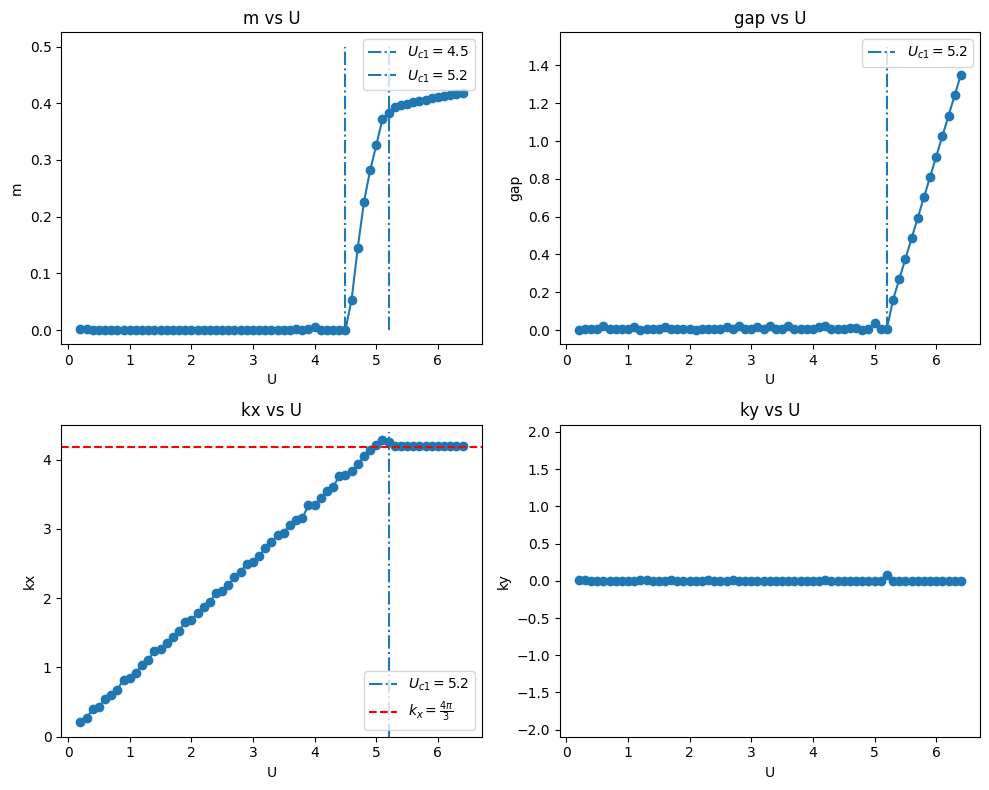

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


axs[0, 0].plot(Ulist, m_end[0])
axs[0, 0].scatter(Ulist, m_end[0])
axs[0, 0].vlines(4.5,0,0.5,linestyles='-.',label='$U_{c1} = 4.5$')
axs[0, 0].vlines(5.2,0,0.5,linestyles='-.',label='$U_{c1} = 5.2$')
axs[0, 0].set_xlabel('U')
axs[0, 0].set_ylabel('m')
axs[0, 0].set_title('m vs U')
axs[0, 0].legend()


axs[0, 1].plot(Ulist, gap_end[0])
axs[0, 1].scatter(Ulist, gap_end[0])
axs[0, 1].vlines(5.2,0,1.5,linestyles='-.',label='$U_{c1} = 5.2$')
axs[0, 1].set_xlabel('U')
axs[0, 1].set_ylabel('gap')
axs[0, 1].set_title('gap vs U')
axs[0, 1].legend()


axs[1, 0].plot(Ulist, qx_end[0])
axs[1, 0].scatter(Ulist, qx_end[0])
axs[1, 0].vlines(5.2,0,4.4,linestyles='-.',label='$U_{c1} = 5.2$')
axs[1, 0].axhline(y = 4*np.pi/3, color='red', linestyle='--', label=r'$k_x = \frac{4\pi}{3}$')
axs[1, 0].set_xlabel('U')
axs[1, 0].set_ylabel('kx')
axs[1, 0].set_title('kx vs U')
axs[1, 0].set_ylim(0, np.pi*(4/3+0.1))
axs[1, 0].legend()

axs[1, 1].plot(Ulist, qy_end[0])
axs[1, 1].scatter(Ulist, qy_end[0])
axs[1, 1].set_xlabel('U')
axs[1, 1].set_ylabel('ky')
axs[1, 1].set_title('ky vs U')
axs[1, 1].set_ylim(-np.pi*2/3, np.pi*2/3)


plt.tight_layout()

plt.show()


As it can be seen, there are two phase transitions at half-filling by varying U values. [[1]](https://arxiv.org/abs/2110.12400) At $U ≈ 4.5t$ we can find a first order transition. There is another phase transition at $U ≈ 5.2t$. It is interesting to notice that the energy gap $\Delta$ only opens for $U > U_{c2}$. Therefore, the 120 degree Mott insulartor phase only occurs for $U>U_{c2}$. Between $U_{c1}$ and $U_{c2}$, it was known that the ground state is a helical order with the wavevector varying with $U$ [[4]](https://onlinelibrary.wiley.com/doi/abs/10.1002/andp.19955070405). Note that HF approximation usually overestimates the magnitude of the order so the critical $U_{c2}$ here is smaller than the value from more accurate many-body calculations.[[1]](https://arxiv.org/abs/2110.12400)

We can also do the calculation in the 6 by 6 matrix form.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [5]:
def genH(H_T,a):
    H = H_T
    H[:,0,0] = -a
    H[:,1,1] = a/2
    H[:,2,2] = a/2
    H[:,3,3] = a
    H[:,4,4] = -a/2
    H[:,5,5] = -a/2
    H[:,1,4] = np.sqrt(3)/2*a
    H[:,2,5] = -np.sqrt(3)/2*a
    H[:,4,1] = np.sqrt(3)/2*a
    H[:,5,2] = -np.sqrt(3)/2*a
    return H


In [6]:
def blkeig(H,dHdm):
    N = H.shape[0]
    dedm = 0
    P = np.zeros((6,6*N),dtype='complex')
    D = np.zeros((6*N),dtype='complex')
    for i in range(N):
        eig_value,eig_vec = np.linalg.eig(H[i])
        D[i*6:i*6+6] = eig_value
        P[:,6*i:6*i+6] = eig_vec
    idx_sort = np.argsort(D)
    D = D[idx_sort]
    P = P[:,idx_sort]
    delta = np.real(D[3*N]-D[3*N-1]) #energy gap for half-filled
    E_Fermi = np.real(D[3*N-1])
    D = D[:3*N]
    P = P[:3*N]
    for i in range(3*N):
        dedm += np.real(P[:,i].conjugate().T @ dHdm @ P[:,i])
    e = np.real(sum(D))
    dedm = np.real(dedm/(3*N))
    e = e/(3*N)

    return e,dedm,delta,E_Fermi


In [7]:
def gendHdm(U):
    dHdm = np.zeros((6,6))
    dHdm[0,0]=-U
    dHdm[1,1]=U/2
    dHdm[2,2]=U/2
    dHdm[3,3]=U
    dHdm[4,4]=-U/2
    dHdm[5,5]=-U/2
    dHdm[1,4]=np.sqrt(3)/2*U
    dHdm[2,5]=-np.sqrt(3)/2*U
    dHdm[4,1]=np.sqrt(3)/2*U
    dHdm[5,2]=-np.sqrt(3)/2*U
    return dHdm

In [8]:
Ulist = np.arange(4,6.5,0.05)
Llist = [30]
alpha = 0.1

e_end = np.inf*np.ones((len(Llist),len(Ulist)))
m_end = np.zeros((len(Llist),len(Ulist)))
itr_end = np.zeros((len(Llist),len(Ulist)))
delta_end = np.zeros((len(Llist),len(Ulist)))
e_end = np.zeros((len(Llist),len(Ulist)))

In [9]:
for i in range(len(Llist)):
    L = Llist[i]
    N = L**2
    Ne = 3*N #one unit cell 3 electrons
    H_T = np.zeros((N,6,6),dtype='complex')
    for j in range(N):
        k = (np.mod(j,L)+1)*np.array([1/3,-np.sqrt(3)/3])+math.ceil((j+1)/L)*np.array([1/3,np.sqrt(3)/3])
        k = k*2*np.pi/L
        A = np.exp(1j*k@np.array([3/2,-np.sqrt(3)/2]))+np.exp(-1j*k@np.array([3/2,np.sqrt(3)/2]))+np.exp(1j*k@np.array([0,np.sqrt(3)]))
        H_T[j,0,1]=A
        H_T[j,0,2]=A.conjugate()
        H_T[j,1,2]=A
        H_T[j,3,4]=A
        H_T[j,3,5]=A.conjugate()
        H_T[j,4,5]=A
        H_T[j,:,:]=H_T[j,:,:]+(H_T[j,:,:].conjugate()).T

    m = 0.005*np.random.random()
    for k in range(len(Ulist)):
        U=Ulist[k]
        error = 1
        itr=0
        dHdm = gendHdm(U)
        while abs(error)>10**-4:
            a = m*U
            H = genH(H_T,a)
            e,dedm,non,non = blkeig(H,dHdm)
            dedm = dedm+2*U*m
            error = alpha*dedm
            m -= error
            itr+=1
        m+=0.00001
        error=1
        while abs(error)>10**-8:
            a = m*U
            H = genH(H_T,a)
            e,dedm,delta,non = blkeig(H,dHdm)
            dedm+=2*U*m
            error=alpha*dedm
            m-=error
            itr+=1
        delta_end[i,k]=delta
        m_end[i,k]=abs(m)
        itr_end[i,k]=itr
        e_end[i,k]=e



50
50


Text(0, 0.5, 'm')

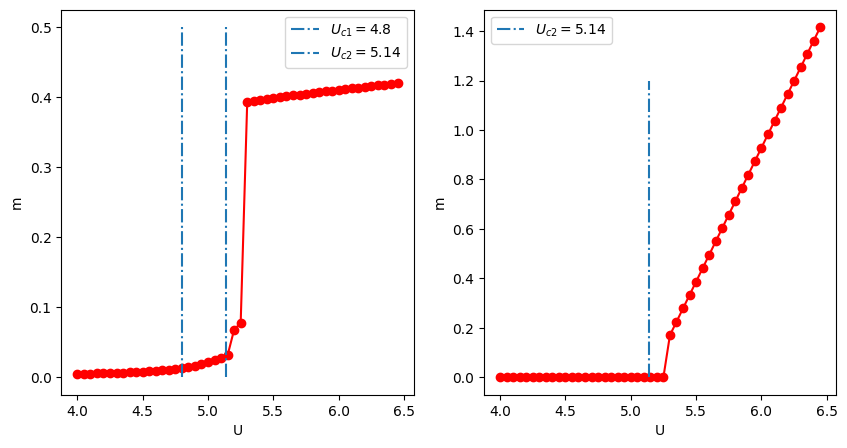

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1 = plt.subplot(1,2,1)
ax1.scatter(Ulist,m_end[0],marker='o',color='r')
ax1.plot(Ulist,m_end[0],linestyle='-',color='r')
ax1.vlines(4.8,0,0.5,linestyles='-.',label='$U_{c1} = 4.8$')
ax1.vlines(5.14,0,0.5,linestyles='-.',label='$U_{c2} = 5.14$')
ax1.legend()
ax1.set_xlabel('U')
ax1.set_ylabel('m')

print(len(Ulist))
print(len(delta_end[0]))
ax2=plt.subplot(1,2,2)
ax2.scatter(Ulist,delta_end[0],marker='o',color='r')
ax2.plot(Ulist,delta_end[0],linestyle='-',color='r')
#plt.vlines(4.8,0,0.5,linestyles='-.',label='$U_{c1}$')
ax2.vlines(5.14,0,1.2,linestyles='-.',label='$U_{c2}=5.14$')
ax2.legend()
ax2.set_xlabel('U')
ax2.set_ylabel('m')

In [ ]:
L=30
b1 = np.array([1/3,np.sqrt(3)/3])*2*np.pi
b2 = np.array([1/3,-np.sqrt(3)/3])*2*np.pi
kpath=np.zeros((2,L+1))
kpath[:,0]= np.array([0,0])
point=1+L//2+L//6+L//3
for i in range(1,L//2+1):
    kpath[:,i]=kpath[:,i-1]+(b1+b2)/L
for i in range(L//2+1,L//2+L//6+1):
    kpath[:,i]=kpath[:,i-1]+(b1-b2)/L
for i in range(1+L//2+L//6,L+1):
    kpath[:,i]=kpath[:,i-1]-(2*b1+b2)/L


In [ ]:
def Plot_dispersion(U_index):
    N = L**2
    U=Ulist[U_index]
    #print('U:',U)
    m = m_end[0,U_index]
    a = m*U
    E1_band = np.zeros((6,L+1))
    H_T = np.zeros((N,6,6),dtype='complex')
    for j in range(N):
        k = (np.mod(j,L)+1)*np.array([1/3,-np.sqrt(3)/3])+math.ceil((j+1)/L)*np.array([1/3,np.sqrt(3)/3])
        k = k*2*np.pi/L
        A = np.exp(1j*k@np.array([3/2,-np.sqrt(3)/2]))+np.exp(-1j*k@np.array([3/2,np.sqrt(3)/2]))+np.exp(1j*k@np.array([0,np.sqrt(3)]))
        H_T[j,0,1]=A
        H_T[j,0,2]=A.conjugate()
        H_T[j,1,2]=A
        H_T[j,3,4]=A
        H_T[j,3,5]=A.conjugate()
        H_T[j,4,5]=A
        H_T[j,:,:]=H_T[j,:,:]+(H_T[j,:,:].conjugate()).T
    H = genH(H_T,a)

    dHdm = gendHdm(U)
    non,non,non,E_Fermi = blkeig(H,dHdm)
    E_Fermi = E_Fermi+m**2*U


    for i in range(L+1):
        k=kpath[:,i]
        H_T_temp=np.zeros((6,6),dtype='complex')
        A = np.exp(1j*k@np.array([3/2,-np.sqrt(3)/2]))+np.exp(-1j*k@np.array([3/2,np.sqrt(3)/2]))+np.exp(1j*k@np.array([0,np.sqrt(3)]))
        H_T_temp[0,1]=A
        H_T_temp[0,2]=A.conjugate()
        H_T_temp[1,2]=A
        H_T_temp[3,4]=A
        H_T_temp[3,5]=A.conjugate()
        H_T_temp[4,5]=A
        H_T_temp[:,:]=H_T_temp[:,:]+(H_T_temp[:,:].conjugate()).T
        H = H_T_temp
        H[0,0] = -a
        H[1,1] = a/2
        H[2,2] = a/2
        H[3,3] = a
        H[4,4] = -a/2
        H[5,5] = -a/2
        H[1,4] = np.sqrt(3)/2*a
        H[2,5] = -np.sqrt(3)/2*a
        H[4,1] = np.sqrt(3)/2*a
        H[5,2] = -np.sqrt(3)/2*a
        eig_value,non = np.linalg.eig(H)
        idx_sort = np.argsort(eig_value)
        eig_value = np.real(eig_value[idx_sort])
        E1_band[:,i]= eig_value + m**2*U

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xticks([1,L/2+1,L/2+L/6+1,L+1])
    ax.vlines([1,L/2+1,L/2+L/6+1,L+1], -6, 8, linestyles='-.', colors='black')
    ax.set_xticklabels(['$\Gamma$', 'M', 'K', '$\Gamma$'])

    plt.hlines(E_Fermi, 0, L+1, colors=None, linestyles='solid', label='Fermi level')
    for i in range(6):
        plt.plot(range(L+1),E1_band[i])
    plt.legend()
    plt.title('U='+str(U))


<>:58: SyntaxWarning: invalid escape sequence '\G'
<>:58: SyntaxWarning: invalid escape sequence '\G'
<>:58: SyntaxWarning: invalid escape sequence '\G'
<>:58: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-1934005576.py:58: SyntaxWarning: invalid escape sequence '\G'
  ax.set_xticklabels(['$\Gamma$', 'M', 'K', '$\Gamma$'])
/tmp/ipython-input-1934005576.py:58: SyntaxWarning: invalid escape sequence '\G'
  ax.set_xticklabels(['$\Gamma$', 'M', 'K', '$\Gamma$'])


Below we plot the dispersion relations along the high symmetry path for 3 different phases. It is clear to see a finite gap in the phase for $U>U_{c2}$.

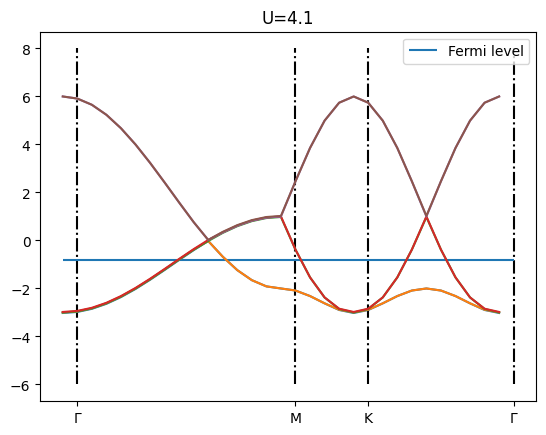

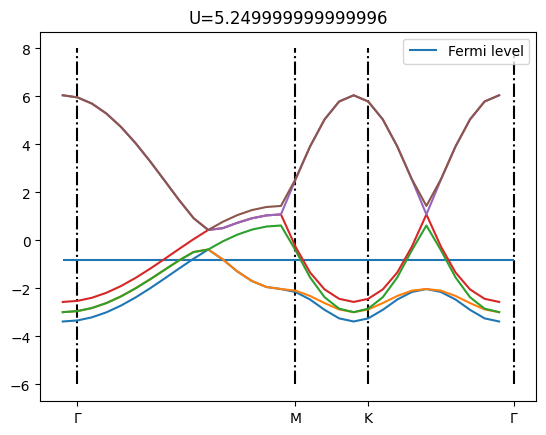

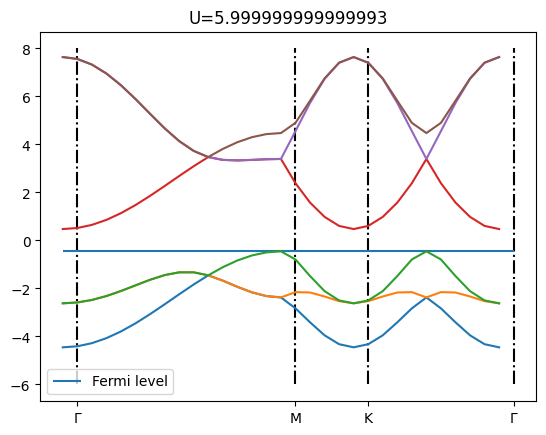

In [ ]:
Plot_dispersion(2)
Plot_dispersion(25)
Plot_dispersion(40)

# To be continued ...